In [1]:
from ete3 import NCBITaxa
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
ncbi = NCBITaxa()
Entrez.email = "julian.pipart@fu-berlin.de"
Entrez.api_key = "8773c6c2cff7ccdcdda9dc42f4b561516909"

In [4]:
# get species name for taxid
def getAllTaxonomyNames(taxid):
    """find all names of a species that can be used for querying the database

    Args:
        taxid (integer): taxon id of a species

    Returns:
        list: list of all names of a species
    """

    handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
    record = Entrez.read(handle)

    record_names = []
    record_names.append(record[0]["ScientificName"])
    for entry in record[0]["OtherNames"]["Synonym"]:
        record_names.append(entry)
    for entry in record[0]["OtherNames"]["EquivalentName"]:
        record_names.append(entry)
    return record_names

# get strain of taxonomy
def get_all_strain_taxids(taxid):
    """find all taxids of strains of a species

    Args:
        taxid (integer): taxon id of a species

    Returns:
        list: list of taxids of strains of a species
    """

    strain_taxids = []
    for taxid in ncbi.get_descendant_taxa(taxid):
        strain_taxids.append(taxid)
    return strain_taxids

def get_all_strain_names(taxid):
    strain_names = []
    for strain_taxid in get_all_strain_taxids(taxid):
        strain_name = ncbi.get_taxid_translator([strain_taxid])
        strain_names.append(strain_name[strain_taxid])
    return strain_names

def get_strain_protein_count(strain_taxid):
    """get number of proteins of a strain

    Args:
        strain_taxid (integer): taxon id of a strain

    Returns:
        integer: number of proteins of a strain
    """

    handle = Entrez.esearch(db="protein", term=f"txid{strain_taxid}", retmode="xml")
    record = Entrez.read(handle)
    return int(record["Count"])

def get_strain_nucleotide_count(strain_taxid):
    """get number of proteins of a strain

    Args:
        strain_taxid (integer): taxon id of a strain

    Returns:
        integer: number of proteins of a strain
    """

    handle = Entrez.esearch(db="nucleotide", term=f"txid{strain_taxid}", retmode="xml")
    record = Entrez.read(handle)
    return int(record["Count"])


def collect_strain_counts(strain_taxids, printing=True):
    """Collect protein and nucleotide counts of strains

    Args:
        strain_taxids (list): list of taxids of strains
    """
    protein_counts = {}
    nucleotide_counts = {}
    for strain_taxid in strain_taxids:
        strain_name = ncbi.translate_to_names([strain_taxid])[0]
        protein_counts[strain_name] = get_strain_protein_count(strain_taxid)
        nucleotide_counts[strain_name] = get_strain_nucleotide_count(strain_taxid)
        print("Strain:", strain_name, "; Protein Count:", protein_counts[strain_name], "; Nucleotide Count:", nucleotide_counts[strain_name])
    return protein_counts, nucleotide_counts

def plot_bias(counts, species, DB_variant, limit=None):
    """plot bias of a species

    Args:
        protein_counts (dict): dictionary of strain taxids and their protein counts
    """

    df = pd.DataFrame.from_dict(counts, orient="index")
    df.sort_values(by=[0], inplace=True, ascending=False)
    if limit:
        df = df.head(limit)
    plt.figure(figsize=(6, 4)) 
    bias_plot = df.plot.bar(legend=False)
    title = f"Number of entries of {species} strains in the NCBI {DB_variant} Database"
    bias_plot.set_title(title)
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(4)
    plt.show()

In [4]:
# 10243 = cowpox
# 10298 = Herpessimplex

## Cowpox Virus

Strain: Cowpox virus (strain Hamburg-1985) ; Protein Count: 1 ; Nucleotide Count: 1
Strain: Cowpox virus (strain Turkmenia-1974) ; Protein Count: 1 ; Nucleotide Count: 1
Strain: Elephantpox virus ; Protein Count: 1 ; Nucleotide Count: 1
Strain: Cowpox virus (strain GRI-90) ; Protein Count: 19 ; Nucleotide Count: 0
Strain: Cowpox virus (Brighton Red) ; Protein Count: 22 ; Nucleotide Count: 0


<Figure size 600x400 with 0 Axes>

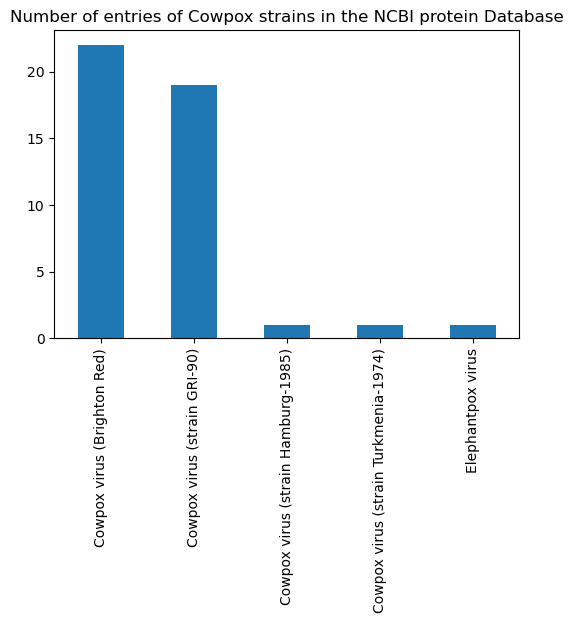

<Figure size 600x400 with 0 Axes>

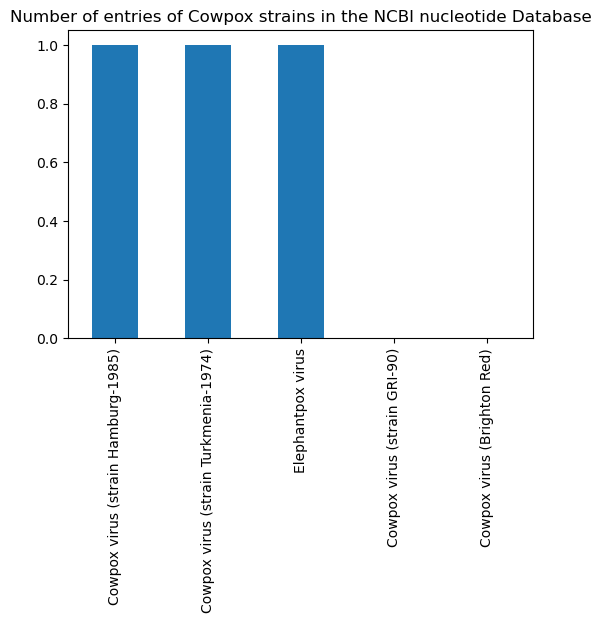

In [5]:
species = "Cowpox" # 10243
strain_taxids = get_all_strain_taxids(10243)
cowpox_protein_counts, cowpox_nucleotide_counts = collect_strain_counts(strain_taxids, printing=False)
plot_bias(cowpox_protein_counts, species, "protein", limit=100)
plot_bias(cowpox_nucleotide_counts, species, "nucleotide", limit=100)

# Herpessimplex 1

Strain: Human alphaherpesvirus 1 strain 17 ; Protein Count: 620 ; Nucleotide Count: 17
Strain: Human alphaherpesvirus 1 strain A44 ; Protein Count: 1 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain Angelotti ; Protein Count: 3 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain CL101 ; Protein Count: 1 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain HFEM ; Protein Count: 6 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain F ; Protein Count: 25 ; Nucleotide Count: 10
Strain: Human alphaherpesvirus 1 strain HZT ; Protein Count: 1 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain KOS ; Protein Count: 106 ; Nucleotide Count: 2
Strain: Human alphaherpesvirus 1 strain MP ; Protein Count: 3 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain Patton ; Protein Count: 2 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain SC16 ; Protein Count: 2 ; Nucleotide Count: 0
Strain: Human alphaherpesvirus 1 strain R-15 ; Pr

<Figure size 1500x1000 with 0 Axes>

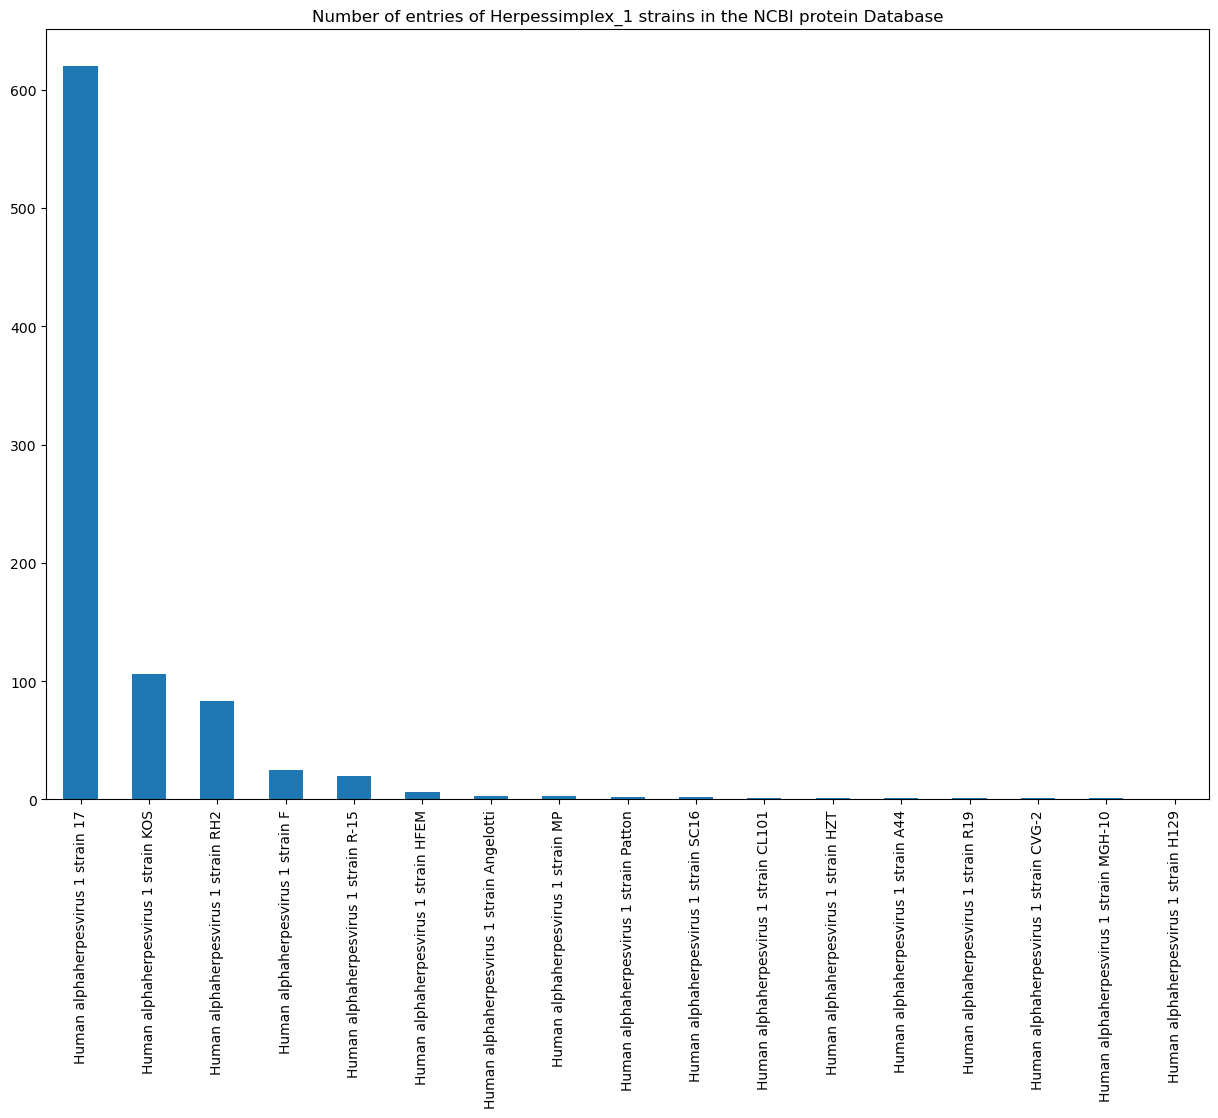

<Figure size 1500x1000 with 0 Axes>

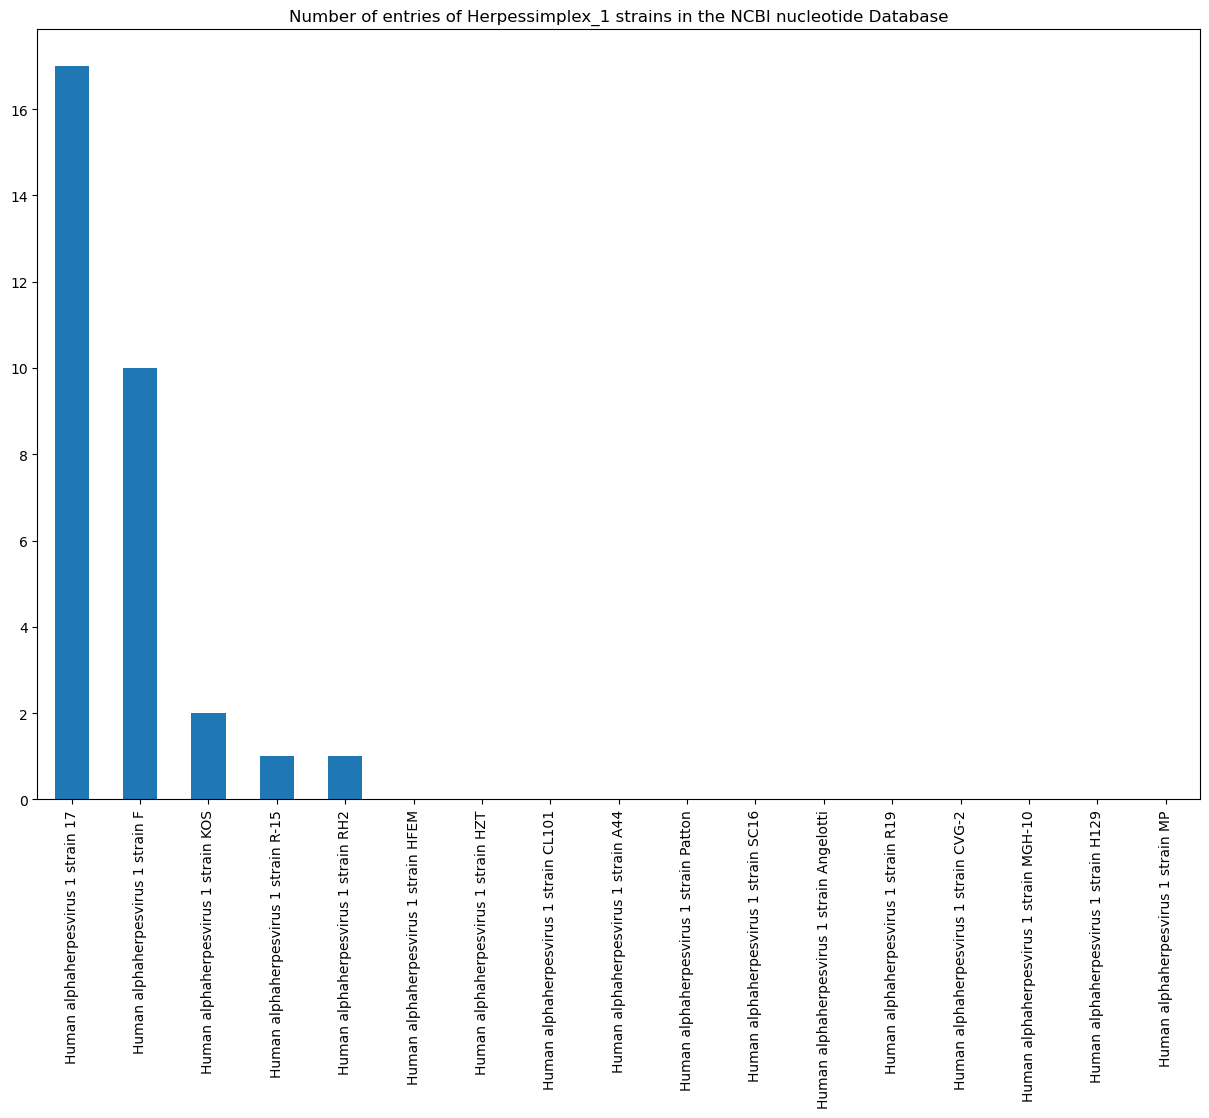

In [31]:
species = "Herpessimplex_1" # 10298
strain_taxids = get_all_strain_taxids(10298)
herpes_protein_counts, herpes_nucleotide_counts = collect_strain_counts(strain_taxids, printing=False)
plot_bias(herpes_protein_counts, species, "protein", limit=100)
plot_bias(herpes_nucleotide_counts, species, "nucleotide", limit=100)

# Get distribution of a fasta file

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

In [11]:
def get_name_distribution(fasta_file):
    """get distribution of strains in a fasta file

    Args:
        fasta_file (string): path to fasta file

    Returns:
        dict: dictionary of strain taxids and their counts
    """

    name_counts = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        name = record.description.split("[")[1]
        name = name.split("]")[0]
        if name not in name_counts:
            name_counts[name] = 0
        name_counts[name] += 1
    return name_counts

def plot_fasta_bias(counts, title, limit=None):
    """plot distribution of a fasta file

    Args:
        protein_counts (dict): dictionary of strain taxids and their protein counts
    """

    df = pd.DataFrame.from_dict(counts, orient="index")
    df.sort_values(by=[0], inplace=True, ascending=False)
    if limit:
        df = df.head(limit)
    plt.figure(figsize=(20, 10)) 
    bias_plot = df.plot.bar()
    bias_plot.set_title(title)
    plt.gcf().set_figwidth(20)
    plt.gcf().set_figheight(10)
    plt.show()

In [12]:
name_dist = get_name_distribution("/Users/julian/Projects/Masterarbeit/DB_Bias/refSeqViral.fasta")

<Figure size 2000x1000 with 0 Axes>

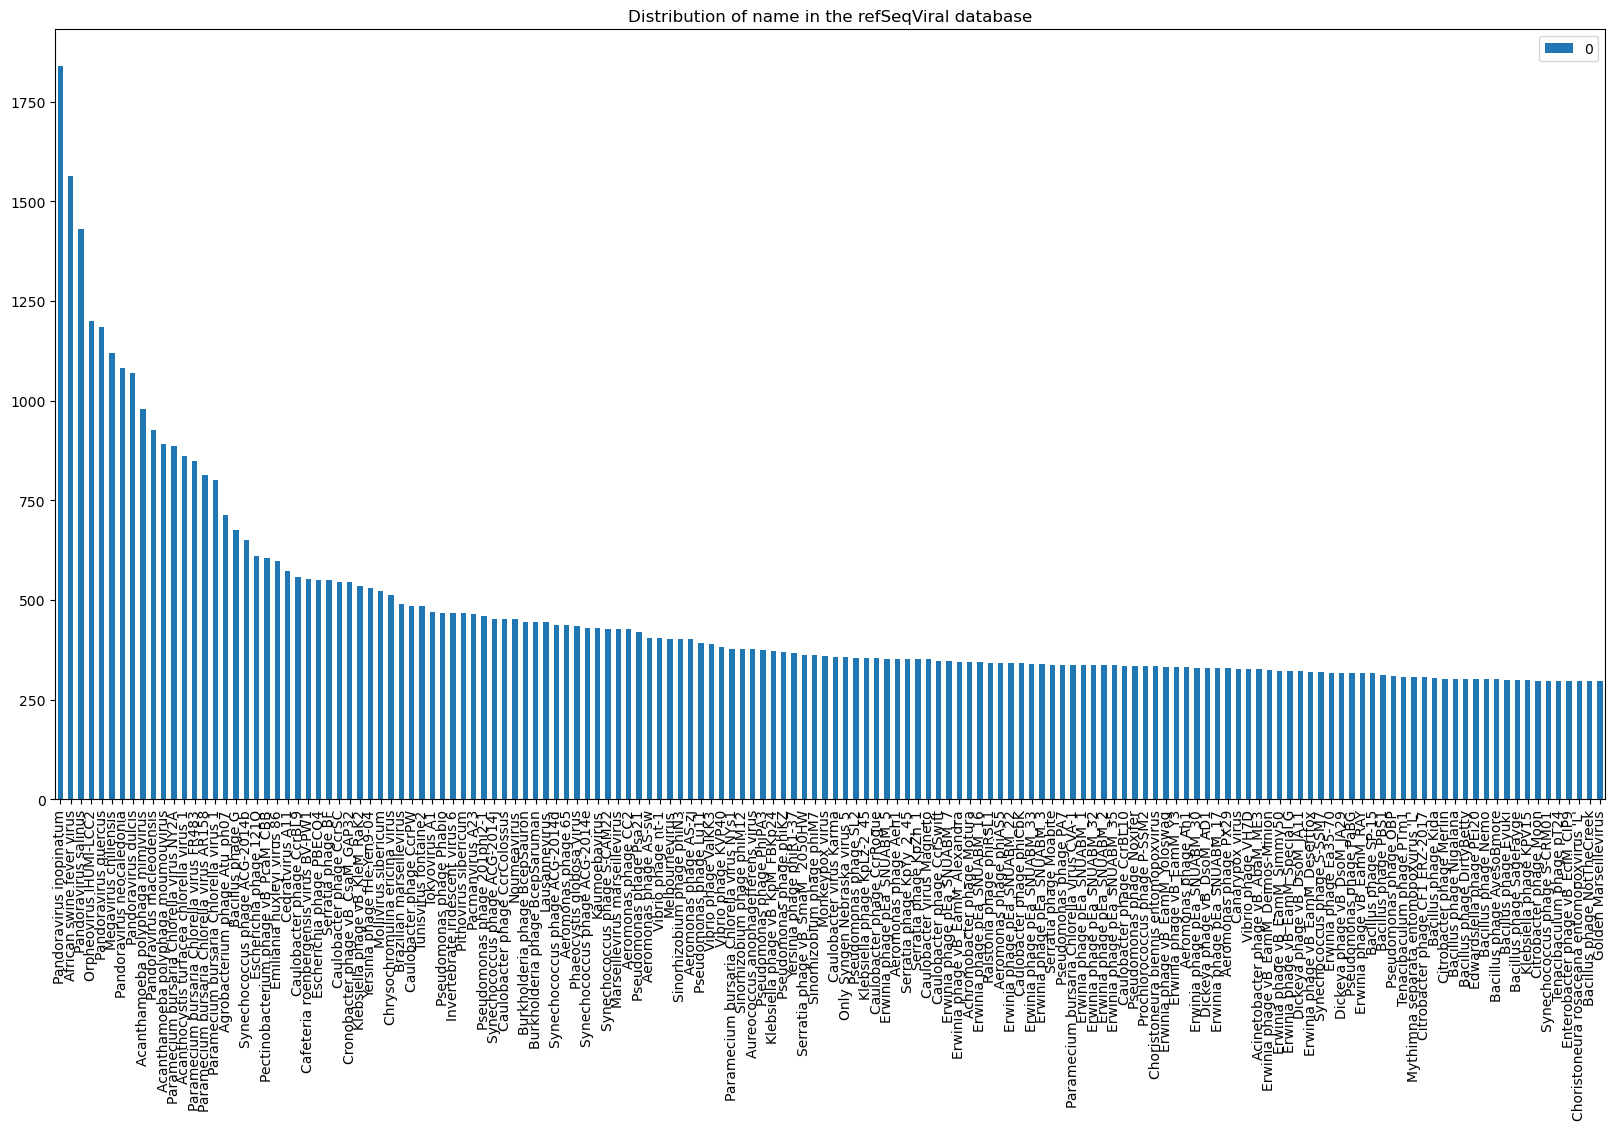

In [13]:
plot_fasta_bias(name_dist, "Distribution of name in the refSeqViral database", limit=150)